# MicroGrad: A Neural Adventure

[![Made with Math](https://img.shields.io/badge/Made%20with-Math%20%E2%9D%A4-red.svg)](https://github.com/Adityak8340/CodeKarpathy)
[![Status](https://img.shields.io/badge/Status-Mind%20Blown%20🤯-brightgreen.svg)](https://github.com/Adityak8340/CodeKarpathy)

Welcome to the neural playground where derivatives come to dance! This notebook implements [Andrej Karpathy's](https://github.com/karpathy) micrograd, taking you on a wild ride through automatic differentiation.

## 🧪 Lab Safety Instructions
<div style="background: linear-gradient(45deg, #2b2b2b, #1a1a1a); padding: 20px; border-radius: 10px; color: #00ff00;">
    <pre>
    SYSTEM STATUS:
    ⚡ Neural Networks: Loaded
    🔄 Gradients: Initialized
    🧠 Sanity Level: Decreasing...
    </pre>
</div>

## Key Features
- Automatic differentiation engine
- Neural networks implemented from scratch
- Backpropagation implementation
- Pure Python implementation

## Acknowledgments
Special thanks to [Andrej Karpathy](https://github.com/karpathy) for creating micrograd and making calculus accessible.

<div align="center">

### Built With Mathematical Rigor and Precision
[![GitHub](https://img.shields.io/badge/GitHub-Repository-blue.svg)](https://github.com/Adityak8340/CodeKarpathy)

</div>

> **⚠️ Side Effects Include:**
> ```python
> while learning:
>     brain.status = "melting" 
>     coffee_needed += 1
>     sanity -= 0.1
> ```

<div align="right">
    <i>"In the grand neural network of life, be the activation function you wish to see in the world." 🌎</i>
</div>

---
<div align="center">
    <b>⭐ Star this repo if you survived the gradients! ⭐</b>
</div>

<style>
  .maths-python {
    font-family: 'Courier New', monospace;
    font-size: 18px;
    color: #fff;
    background: linear-gradient(45deg, #2b2b2b, #1a1a1a);
    text-align: center;
  }
</style>

<div class="maths-python">

  If you get the numbers and the logic, no need for extra fluff—just dive into the code and let the equations speak for themselves. </p>
  
</div>

In [3]:
import math
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 -  4*x + 5

In [5]:
f(3.0)

20.0

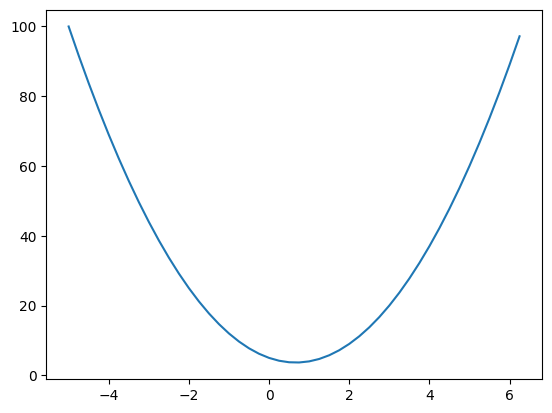

In [6]:
xs=np.arange(-5, 6.26, 0.25)
ys=f(xs)    
plt.plot(xs, ys)

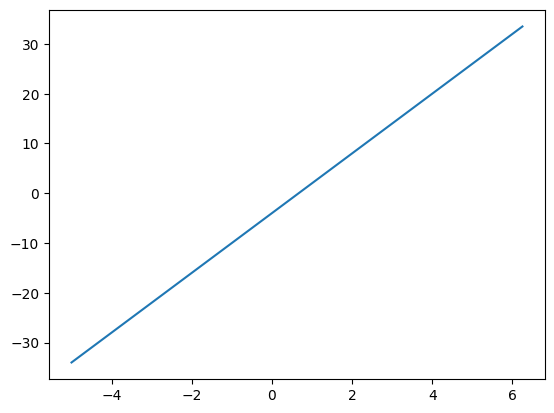

In [7]:
def derf(x):     # derivative of f(x)
    return 6*x - 4

xs=np.arange(-5, 6.26, 0.25)
ys=derf(xs)
plt.plot(xs, ys)

In [8]:
h = 0.0000001
x = -3.0
derivative = (f(x+h) - f(x))/h
print(derivative)

-21.999999688659955


In [9]:
# lets get more complex

a=2.0
b=-3.0
c=10.0  
d=a*b + c
print(d)

4.0


In [10]:
h = 0.0001

# Inputs
a=2.0
b=-3.0
c=10.0  


d1=a*b + c
a+=h
d2=a*b + c

print('d1 -->', d1) 
print('d2 -->', d2)
print('slope -->', (d2-d1)/h)

d1 --> 4.0
d2 --> 3.999699999999999
slope --> -3.000000000010772


d2 decreased => slope is negative

In [11]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad=0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            self.grad += 1*out.grad
            other.grad += 1*out.grad
        out._backward = _backward
        return out
    
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data*out.grad
            other.grad += self.data*out.grad
        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other*self.data**(other-1))*out.grad
        out._backward = _backward
        return out
    
    def __rmul__(self, other): # other*Value(2.0)
        return self * other
    
    def __truediv__(self, other):
        return self * other**-1
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self,), 'tanh')
        def _backward():
            self.grad += (1-t**2)*out.grad
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')
        def _backward():
            self.grad += math.exp(x)*out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set() 
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1
        for node in reversed(topo):
            node._backward()
    
    
a=Value(2.0, label='a')
b=Value(-3.0, label='b')
c=Value(10.0, label='c')
e=a+b; e.label='e'
d=e+c; d.label='d'
f=Value(3.0, label='f')
L=d*f; L.label='L'
L

Value(data=27.0)

In [12]:
a + 3.4

Value(data=5.4)

In [13]:
from graphviz import Digraph # type: ignore

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

In [14]:
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})   # Left to Right
    nodes, edges = trace(root)
    for n in nodes:
        uid= str(id(n))
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot

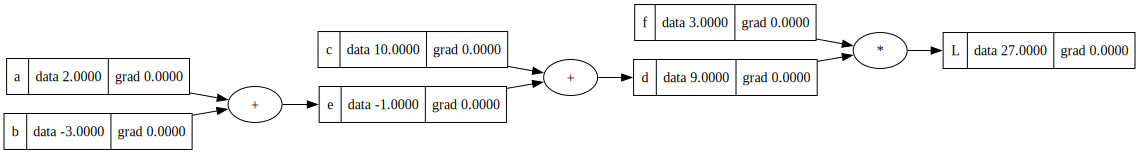

In [15]:
draw_dot(L)

In [16]:
d.grad= 6.0
f.grad=12.0

In [17]:
def lol():
    h=0.001
    a=Value(2.0, label='a')
    b=Value(-3.0, label='b')
    c=Value(10.0, label='c')
    e=a+b; e.label='e'
    d=e+c; d.label='d'
    f=Value(3.0, label='f')
    L=d*f; L.label='L'
    L1=L.data

    a=Value(2.0 + h, label='a')
    b=Value(-3.0, label='b')
    c=Value(10.0, label='c')
    e=a+b; e.label='e'
    d=e+c; d.label='d'
    d.data+=h
    f=Value(3.0, label='f')
    L=d*f; L.label='L'
    L2=L.data
    print('slope -->', (L2-L1)/h)

lol()

slope --> 5.999999999996675


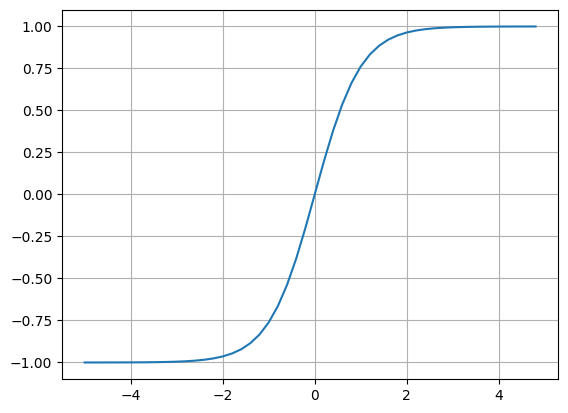

In [18]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

In [19]:
# inputs x1, x2

x1=Value(2.0, label='x1')
x2=Value(0.0, label='x2')

# weights w1, w2
w1=Value(-3.0, label='w1')
w2=Value(1.0, label='w2')

# bias
b=Value(6.8813735870195432, label='b')


# n = x1*w1 + x2*w2 + b
x1w1=x1*w1; x1w1.label='x1*w1'
x2w2=x2*w2; x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2+b; n.label='n'
o=n.tanh(); o.label='o'

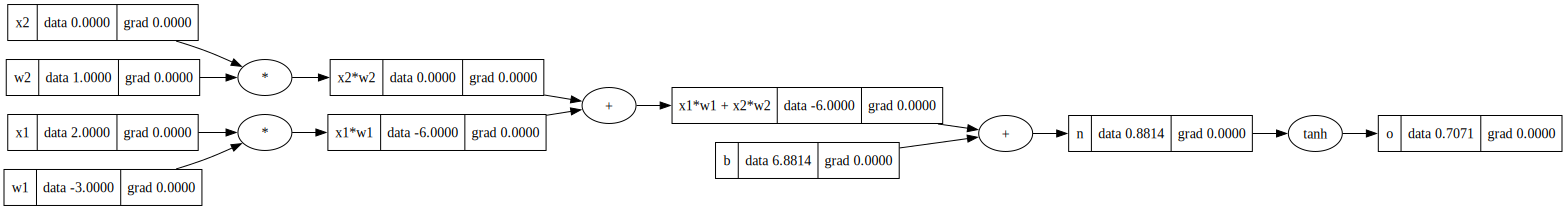

In [20]:
draw_dot(o)

In [21]:
o.backward()

In [22]:
o.grad=1.0

topo = []
visited = set() 
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

for node in reversed(topo):
    node._backward()

In [23]:
topo = []
visited = set() 
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [24]:
o.grad=1.0
o._backward()

In [25]:
n._backward()

In [26]:
b._backward()

In [27]:
x1w1x2w2._backward()

In [28]:
x2w2._backward()
x1w1._backward()

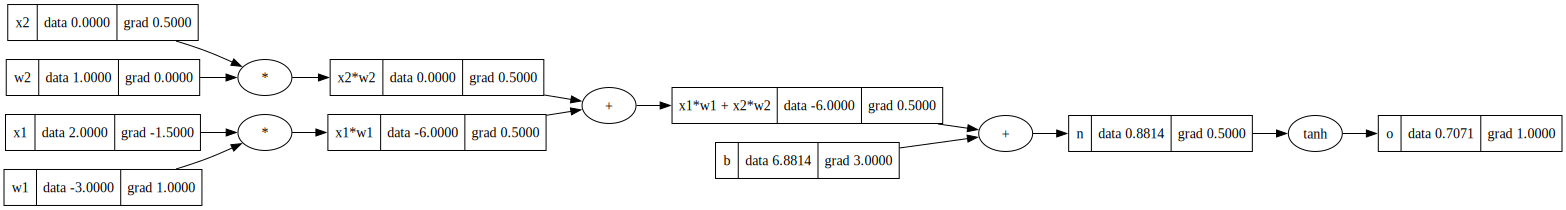

In [29]:
o.grad=1.0
n.grad=0.5
x1w1x2w2.grad=0.5
x1w1.grad=0.5
x2w2.grad=0.5
x2.grad=w2.data * x2w2.grad
w2.grad=x2.data * x2w2.grad
x1.grad=w1.data * x1w1.grad
w1.grad=x1.data * x1w1.grad
draw_dot(o)

In [30]:
# O = tanh(n)   
# dO/dn = 1 - O^2

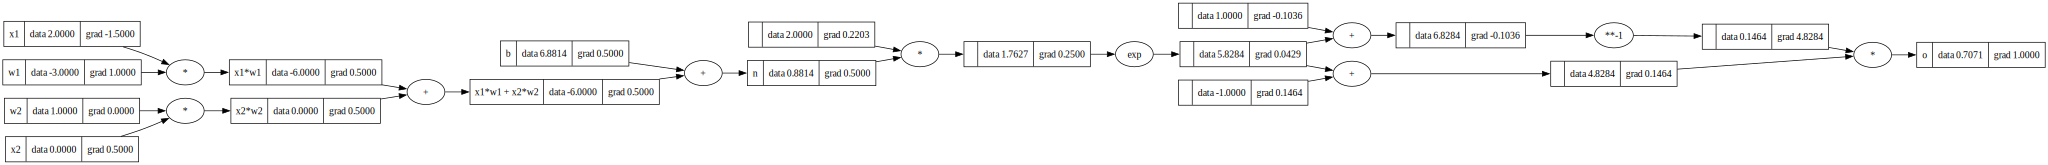

In [31]:
# inputs x1, x2

x1=Value(2.0, label='x1')
x2=Value(0.0, label='x2')

# weights w1, w2
w1=Value(-3.0, label='w1')
w2=Value(1.0, label='w2')

# bias
b=Value(6.8813735870195432, label='b')


# n = x1*w1 + x2*w2 + b
x1w1=x1*w1; x1w1.label='x1*w1'
x2w2=x2*w2; x2w2.label='x2*w2'
x1w1x2w2=x1w1+x2w2; x1w1x2w2.label='x1*w1 + x2*w2'
n = x1w1x2w2+b; n.label='n'
#--------------------------
e = (2*n).exp()
o = (e -1)/(e + 1); o.label='o'
o.backward()
draw_dot(o)

## Micrograd using Pytorch

In [32]:
import torch

In [33]:
x1 = torch.Tensor([2.0]).double()                  ; x1.requires_grad=True
x2 = torch.Tensor([0.0]).double()                  ; x2.requires_grad=True
w1 = torch.Tensor([-3.0]).double()                 ; w1.requires_grad=True
w2 = torch.Tensor([1.0]).double()                  ; w2.requires_grad=True
b = torch.Tensor([6.8813735870195432]).double()    ; b.requires_grad=True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('------')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
------
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [34]:
import random
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w *x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]    
    
class Layer:
    def __init__(self, n, m):
        self.neurons = [Neuron(n) for _ in range(m)]
    
    def __call__(self, x):
        outs =  [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
    
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for l in self.layers:
            x = l(x)
        return x
    
    def parameters(self):
        return [p for l in self.layers for p in l.parameters()]



In [35]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.25151313008705944)

In [36]:
len(n.parameters())

41

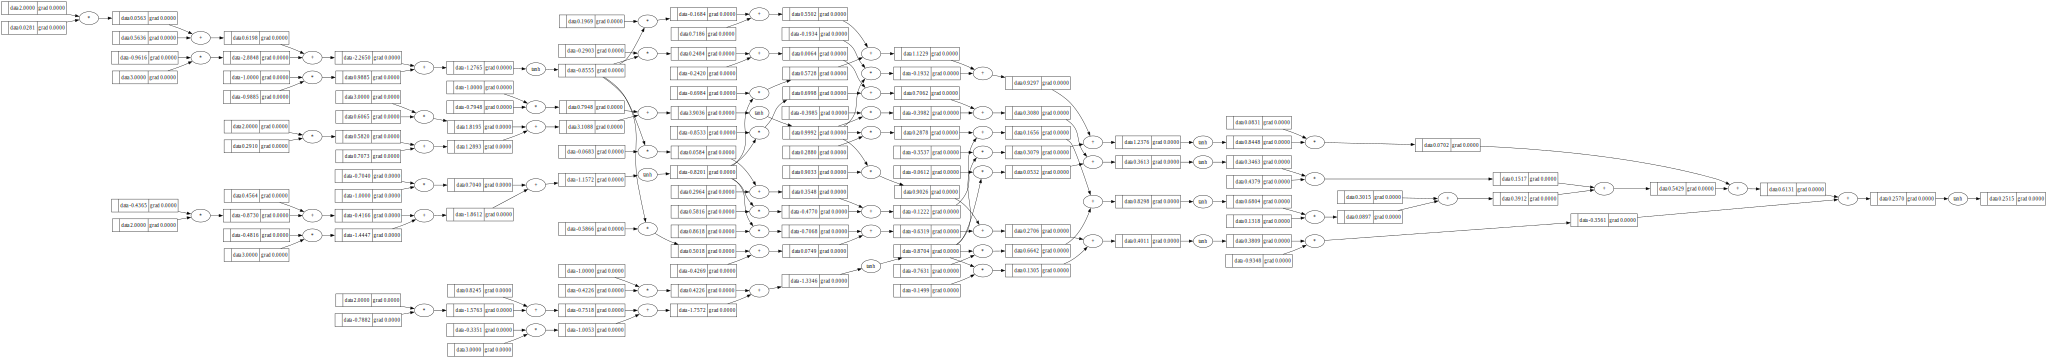

In [37]:
draw_dot(n(x))

In [46]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=0.2786635048326021),
 Value(data=0.7529507685045548),
 Value(data=0.46413598437827885),
 Value(data=-0.10305171668920908)]

In [47]:
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]   # mse

[Value(data=0.5203263392603855),
 Value(data=3.0728363968007097),
 Value(data=2.1436941807513517),
 Value(data=1.2167230896910113)]

In [48]:
# Fix loss calculation by ensuring all values are Value objects
def calculate_loss(ypred, ys):
    # Convert ground truth values to Value objects if they aren't already
    ys = [Value(y) if not isinstance(y, Value) else y for y in ys]
    # Calculate MSE loss
    losses = [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]
    return sum(losses, Value(0.0))

# Use the fixed loss calculation
loss = calculate_loss(ypred, ys)
loss

Value(data=6.953580006503458)

In [57]:
loss.backward()

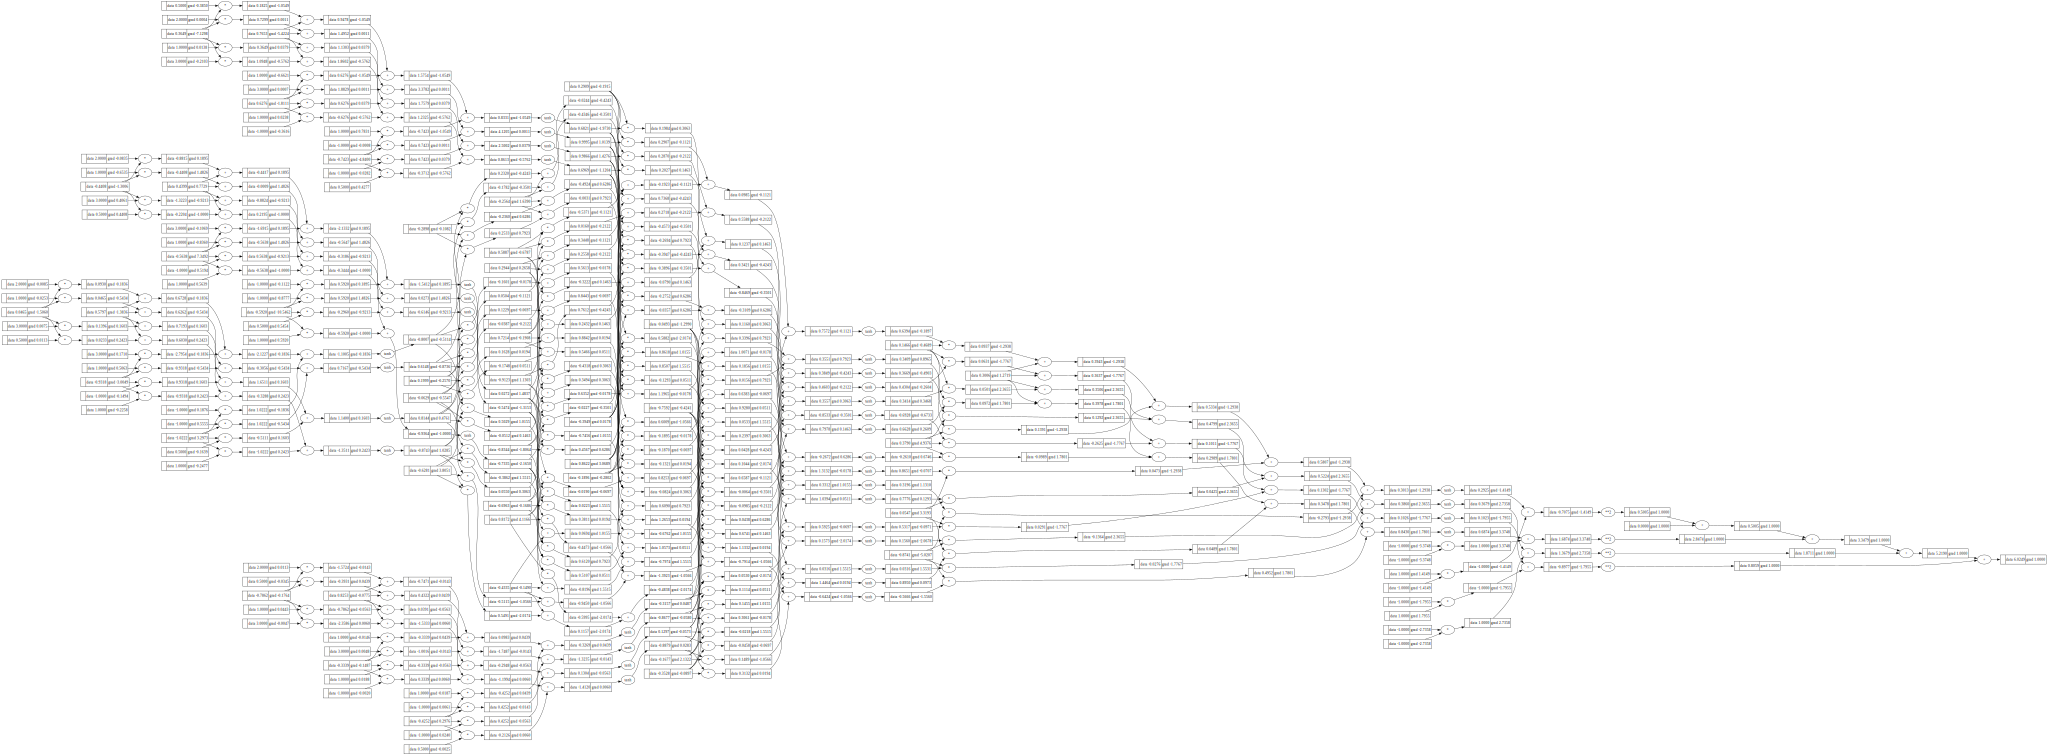

In [58]:
draw_dot(loss)

In [59]:
n.layers[0].neurons[0].w[0].grad

-1.5059921687380506

In [66]:
n.layers[0].neurons[0].w[0].data

0.0763854270458949

In [108]:
loss.backward()

In [109]:
for p in n.parameters():
    p.data += -0.01*p.grad

In [110]:
ypred = [n(x) for x in xs]

# Fix loss calculation by ensuring all values are Value objects
def calculate_loss(ypred, ys):
    # Convert ground truth values to Value objects if they aren't already
    ys = [Value(y) if not isinstance(y, Value) else y for y in ys]
    # Calculate MSE loss
    losses = [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]
    return sum(losses, Value(0.0))

# Use the fixed loss calculation
loss = calculate_loss(ypred, ys)
loss

Value(data=0.010685029603000707)

In [111]:
ypred

[Value(data=0.9699656275191441),
 Value(data=-0.9405566071652794),
 Value(data=-0.9245979744190013),
 Value(data=0.9762516598630259)]

In [112]:
n.parameters()

[Value(data=0.48523059207699826),
 Value(data=0.9722760207856538),
 Value(data=-2.2981643382398493),
 Value(data=0.981976805368081),
 Value(data=1.127469250427418),
 Value(data=-2.331013893348697),
 Value(data=2.083915694326813),
 Value(data=0.8376364985277869),
 Value(data=1.975190975804179),
 Value(data=0.9772005580078088),
 Value(data=0.29584575139612823),
 Value(data=1.9463047270420537),
 Value(data=-0.6670532599066301),
 Value(data=0.016521132065083266),
 Value(data=-0.7919316751902958),
 Value(data=0.8858904322764161),
 Value(data=0.07211164717534348),
 Value(data=0.7118877182344636),
 Value(data=0.3184947815814958),
 Value(data=-0.665251071063113),
 Value(data=0.2220291551398505),
 Value(data=-0.0625571366890974),
 Value(data=-0.7244460398125662),
 Value(data=-0.30382781932490377),
 Value(data=0.16837812399898183),
 Value(data=-0.495317835799598),
 Value(data=0.21087284900198927),
 Value(data=-0.5432196517289456),
 Value(data=-0.07155129183404416),
 Value(data=-0.431157831947864

In [123]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.18666048594094517)

In [124]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets

In [165]:
for k in range(20):

    # Forward pass
    ypred = [n(x) for x in xs]
    loss = calculate_loss(ypred, ys)

    # Backward pass
    for p in n.parameters():
        p.grad = 0.0
    loss.backward()

    # Update
    for p in n.parameters():
        p.data += -0.05*p.grad
    print(k, loss.data)

0 0.0031782858775874796
1 0.003168919888169812
2 0.0031596061577360557
3 0.0031503442593746687
4 0.003141133770754237
5 0.0031319742740629334
6 0.003122865355948579
7 0.003113806607459742
8 0.003104797623987983
9 0.0030958380052106818
10 0.00308692735503497
11 0.003078065281542427
12 0.003069251396934752
13 0.003060485317480089
14 0.0030517666634603882
15 0.003043095059119543
16 0.0030344701326121097
17 0.003025891515953093
18 0.0030173588449684072
19 0.0030088717592459562


In [166]:
ypred

[Value(data=0.9739039520072249),
 Value(data=-0.9716229232056509),
 Value(data=-0.9694442535004494),
 Value(data=0.9757315862309143)]

**Thanks For Staying with me till now**

## 🎭 Epilogue: A Neural Network's Last Laugh

Dear Andrej Karpathy,
Thanks for making my brain melt with micrograd. As someone who thought they loved math, this was like going on a first date with calculus and discovering they brought their entire family tree of derivatives along. 

My neurons are now questioning their life choices, and my gradients have officially gone backwards more times than my career decisions. 

But seriously, this was brilliant! Though I must say, after all these backpropagations, my mental state has achieved a perfect tanh(-∞) 😵‍💫

P.S. My therapist says I now differentiate everything in my life. Send help.

*With gradients of gratitude and a brain that's definitely not at a local minimum,*
A humbled math enthusiast
<br>
<div style="background: linear-gradient(45deg, #1a1a1a, #2d2d2d); padding: 20px; border-radius: 10px; color: #00ff00; font-family: 'Courier New'">
    <h3>🧠 Neural Network Status Report:</h3>
    <pre>
    ERROR 404: Sanity Not Found
    WARNING: Brain.exe has stopped working
    FATAL: Stack overflow in cerebral cortex
    </pre>
    <hr style="border: 1px dashed #00ff00">
    <p style="color: #ff3333">Side effects may include:</p>
    <ul>
        - Dreaming in partial derivatives
        - Accidentally backpropagating through life decisions
        - Seeing neural networks in coffee stains
        - Calculating gradients while grocery shopping
    </ul>
    <br>
    <div style="text-align: center; font-size: 12px; color: #888">
        ⚠️ If symptoms persist, please consult your nearest AI therapist ⚠️
        <br>
        <i>No neurons were permanently damaged in the making of this notebook</i>
        <br>
        (though several are now severely confused)
    </div>
</div>